# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [93]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [95]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 607


['richards bay',
 'port-aux-francais',
 'albany',
 'naracoorte',
 'brush',
 'tura',
 'wynyard',
 'codrington',
 'edinburgh of the seven seas',
 'greenville',
 'vorgashor',
 'hermanus',
 'adamstown',
 'valparaiso',
 'segezha',
 'qaqortoq',
 'tsiombe',
 'keflavik',
 'blackmans bay',
 'jamestown',
 'saint-ave',
 'klyuchi',
 'ushuaia',
 'hithadhoo',
 'lihue',
 'chita',
 'kapit',
 'kalemie',
 'susuman',
 'qamdo',
 'atafu village',
 'buabidi',
 'wailua homesteads',
 'el gouna',
 'vizinga',
 'waitangi',
 'taiohae',
 'fort bragg',
 'bredasdorp',
 'carneys point',
 'toga village',
 'samoylovka',
 'whitehorse',
 'longyearbyen',
 'punta arenas',
 'strelka',
 'yeppoon city centre',
 'walvis bay',
 'yarmouth',
 'berdigestyakh',
 'talnakh',
 'barra de santo antonio',
 'ceeldheer',
 'petropavlovsk-kamchatsky',
 'menongue',
 'cargados carajos',
 'invercargill',
 'mount isa',
 'college',
 'grytviken',
 'papatowai',
 'nuuk',
 'namibe',
 'ciudad bolivar',
 'tamanrasset',
 'mszana dolna',
 'hawaiian parad

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i > 0:
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    print(city_url)

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        if city_weather["cod"] == 200:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City {city} not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred for city {city}: {e}. Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=4d5d0d37fa714d5bc9f44819e9c0370a&q=richards bay
Processing Record 1 of Set 1 | richards bay
-----------------------------
Data Retrieval Complete
-----------------------------


In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64


In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,20.60,82,87,1.90,MG,1698277662
1,hawaiian paradise park,19.5933,-154.9731,27.80,81,75,3.09,US,1698277593
2,kingscliff,-28.2667,153.5667,26.52,65,100,4.12,AU,1698277663
3,adamstown,-25.0660,-130.1015,22.83,81,23,6.30,PN,1698277663
4,papatowai,-46.5619,169.4708,7.39,91,81,7.09,NZ,1698277663


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("../../output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("../../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,20.60,82,87,1.90,MG,1698277662
1,hawaiian paradise park,19.5933,-154.9731,27.80,81,75,3.09,US,1698277593
2,kingscliff,-28.2667,153.5667,26.52,65,100,4.12,AU,1698277663
3,adamstown,-25.0660,-130.1015,22.83,81,23,6.30,PN,1698277663
4,papatowai,-46.5619,169.4708,7.39,91,81,7.09,NZ,1698277663


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

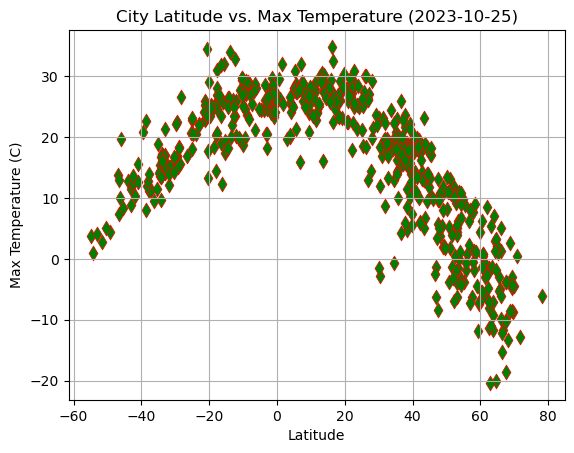

In [76]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    c="green",
    s=58,
    linewidths=.5,
    marker="d", 
    alpha=1,
    label="Cities"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("../../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

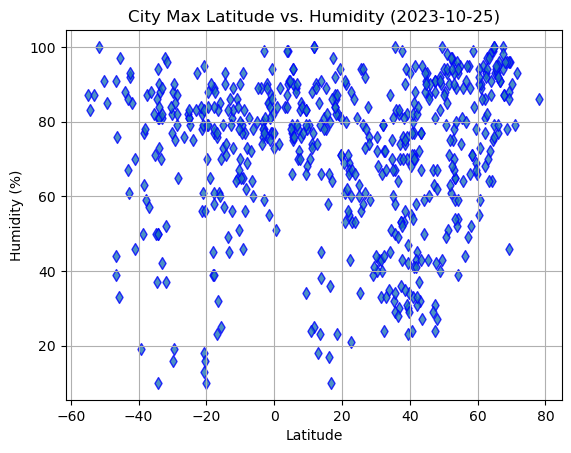

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="blue",
            linewidths=1,
            marker="d", 
            alpha=0.8,
            label="Cities"
           )

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("../../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

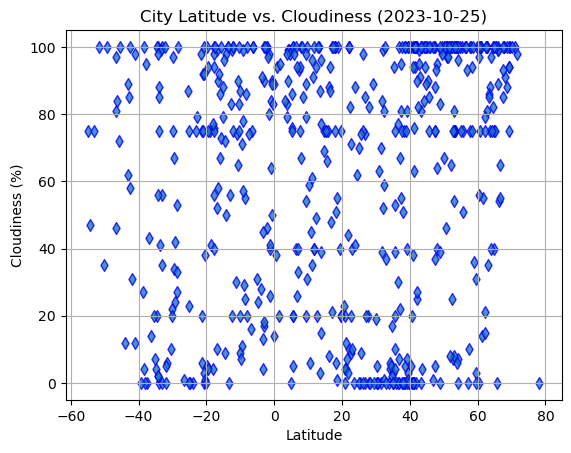

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="blue",
            linewidths=1,
            marker="d", 
            alpha=0.8,
            label="Cities"
           )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("../../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

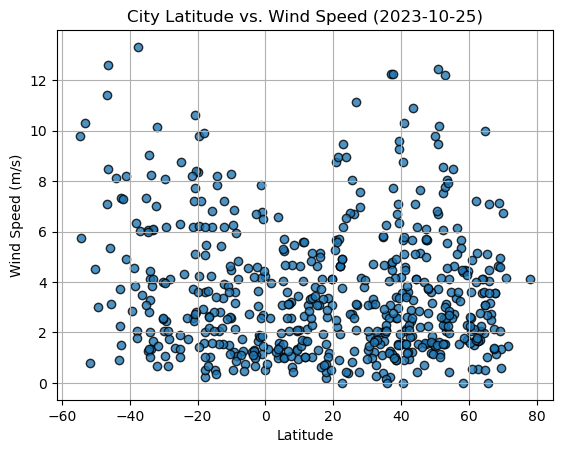

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hawaiian paradise park,19.5933,-154.9731,27.80,81,75,3.09,US,1698277593
6,magistral'nyy,56.1725,107.4458,0.76,44,100,3.37,RU,1698277663
7,kudymkar,59.0173,54.6560,-4.46,84,36,4.47,RU,1698277664
9,tiksi,71.6872,128.8694,-12.89,93,98,1.48,RU,1698277664
10,thompson,55.7435,-97.8558,-1.91,64,75,4.63,CA,1698277664


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,20.60,82,87,1.90,MG,1698277662
2,kingscliff,-28.2667,153.5667,26.52,65,100,4.12,AU,1698277663
3,adamstown,-25.0660,-130.1015,22.83,81,23,6.30,PN,1698277663
4,papatowai,-46.5619,169.4708,7.39,91,81,7.09,NZ,1698277663
5,lebu,-37.6167,-73.6500,11.11,87,0,13.32,CL,1698277663


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7685189990629143
The r value is: -0.876652153971525


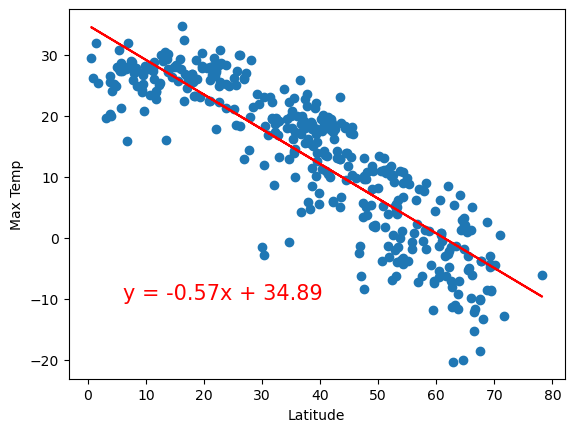

In [88]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is: 0.4121057168607245


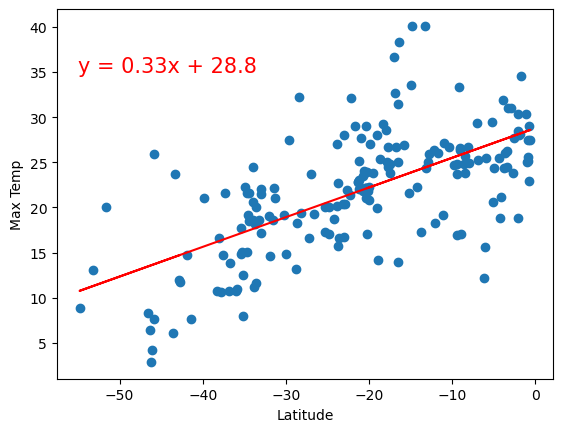

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** It appears that max temperature increases as the latitude gets closer to 0. This is essentially telling us it's hotter closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


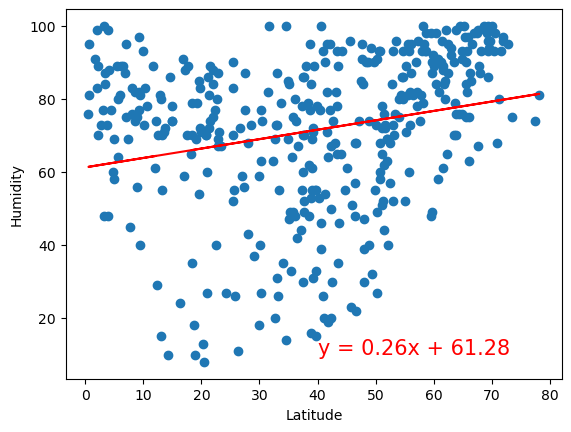

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.0002808747046324607


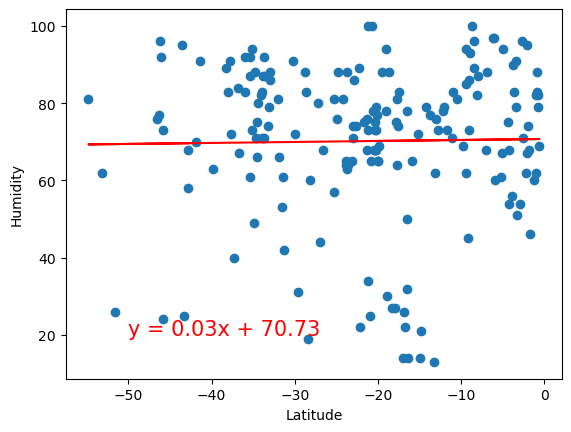

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** There doesn't seem to be much of a corelation between humidity and lattitude. The R-value is low and both graphs doen't show much of a trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.030149309409177445
The r value is: 0.1736355649317773


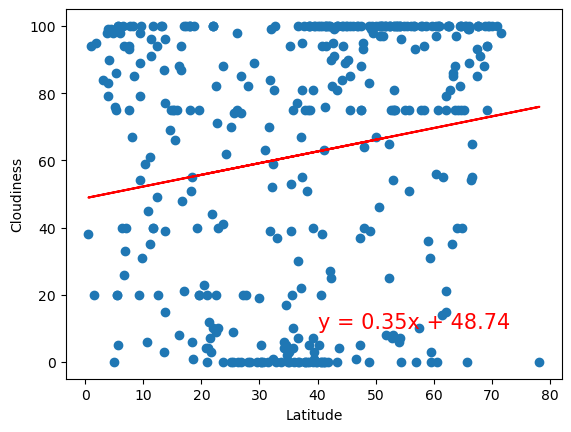

In [89]:
# Northern Hemisphere
x_valus = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (40,10))

The r-squared value is: 0.009060132208479234
The r value is: 0.09518472676054301


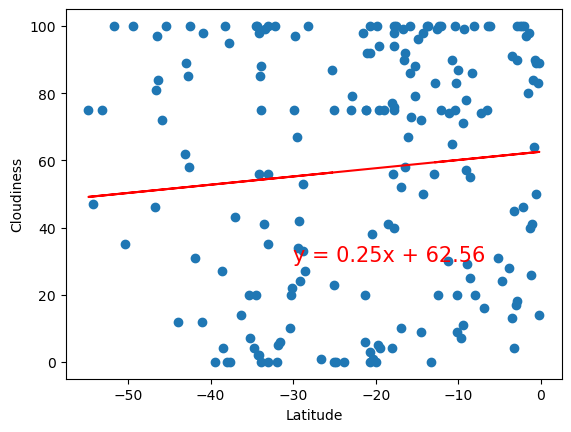

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** There doesn't appear to be much corelation between cloudiness and latitude. The r value is low.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.009046001397213562
The r value is: 0.09511046944061186


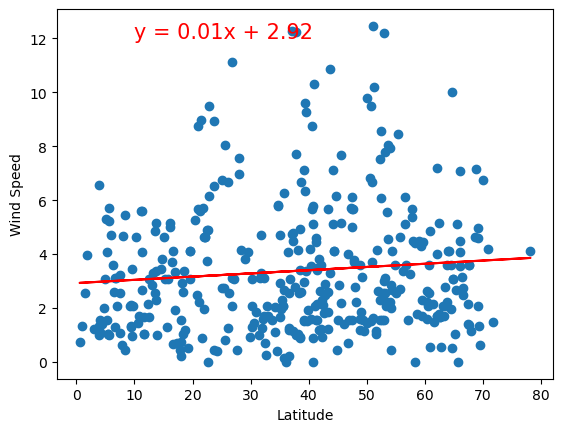

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.089011258729689
The r value is: -0.2983475468806288


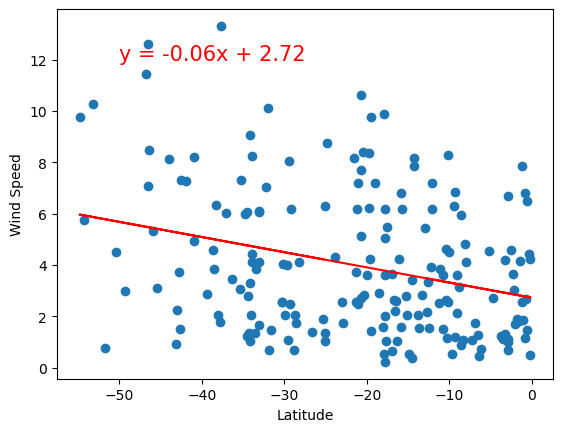

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** Again these plots are a bit scattered but there does seem to be a very small corelation between windspeed and latitude. It appears that as we get closer to the equator, the windspeed lowers, and the closer to the poles the windspeed increases, just slightly. 